# Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment=None
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df = pd.read_excel('vente_maillots_de_bain.xlsx',sheet_name='Sheet2')
df.head()

,Years,Sales,Unnamed: 2
0,2001-01-01,139.7,NaN
1,2001-02-01,114.3,NaN
2,2001-03-01,101.6,NaN
3,2001-04-01,152.4,NaN
4,2001-05-01,215.9,NaN


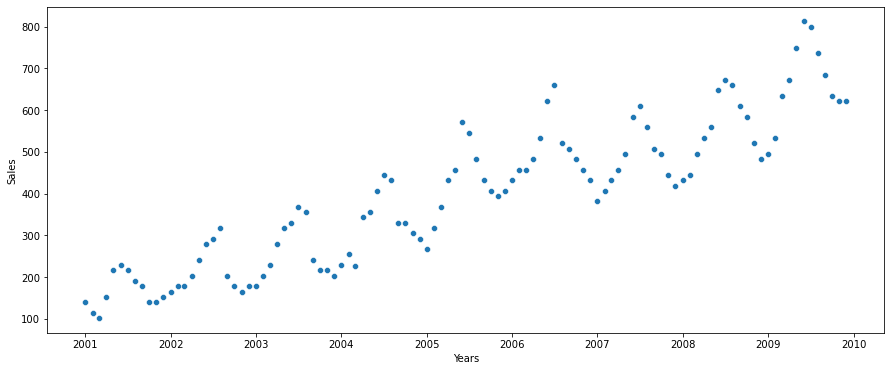

In [3]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="Years", y="Sales", data=df)
plt.show()

In [4]:
df['Time']= np.arange(1, 109, 1) # debut (inclus) , fin (non inclus) , pas
df.head()

,Years,Sales,Unnamed: 2,Time
0,2001-01-01,139.7,NaN,1
1,2001-02-01,114.3,NaN,2
2,2001-03-01,101.6,NaN,3
3,2001-04-01,152.4,NaN,4
4,2001-05-01,215.9,NaN,5


In [5]:
df_train = df.loc[:81]
df_test = df.loc[82:]

In [6]:
df_train.tail()

,Years,Sales,Unnamed: 2,Time
77,2007-06-01,584.2,NaN,78
78,2007-07-01,609.6,NaN,79
79,2007-08-01,558.8,NaN,80
80,2007-09-01,508.0,NaN,81
81,2007-10-01,495.3,NaN,82


In [7]:
df_test.head()

,Years,Sales,Unnamed: 2,Time
82,2007-11-01,444.5,NaN,83
83,2007-12-01,419.1,NaN,84
84,2008-01-01,431.8,NaN,85
85,2008-02-01,444.5,NaN,86
86,2008-03-01,495.3,NaN,87


In [8]:
# On utilise [[ ]] pour se referer à la colonne et non aux valeurs de celle-ci
x_train = df_train[['Time']].values
x_test = df_test[['Time']].values

y_train = df_train[['Sales']].values
y_test = df_test[['Sales']].values

Utilisation de Sklearn pour créer un modèle regressif

In [9]:
model_trend = LinearRegression()

In [10]:
model_trend.fit(x_train, y_train)

LinearRegression()

In [11]:
y_fitted_values = model_trend.predict(x_train)
y_predicted_values = model_trend.predict(x_test)

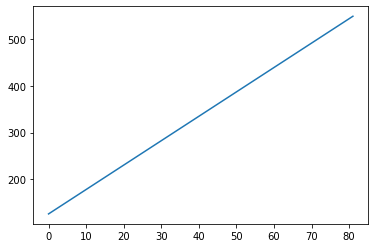

In [12]:
plt.plot(y_fitted_values)

Calculer l'intervalle de confiance:

- Calculer l'erreur
- Calculer l'écart type de l'erreur
- Choisir l'intervalle de confiance que l'on souhaite

In [13]:
error = y_train - y_fitted_values
std_error = error.std() # calcul de l'écart type de l'erreur.
interval = 4.4 * std_error

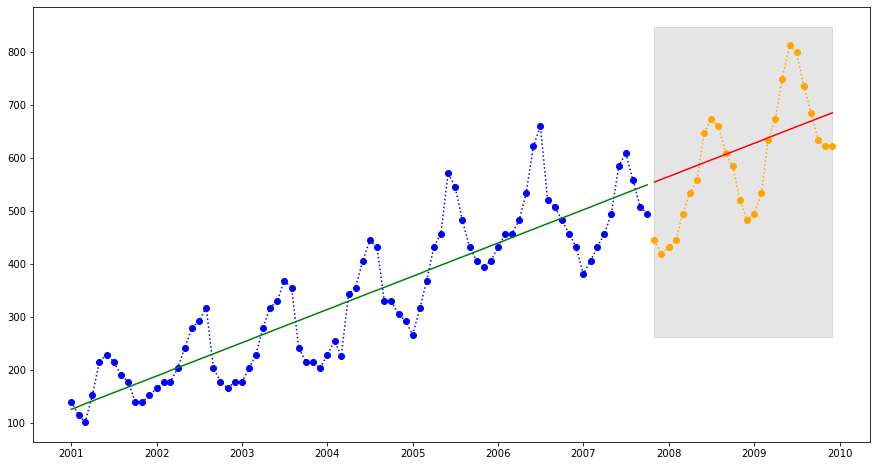

In [14]:
plt.figure(figsize=(15, 8))
# train base
plt.plot(df_train["Years"], y_train, "bo:") #bo: B = Bleu,  O = utilisation de gros points,  : = ligne en pointillés
plt.plot(df_train['Years'], y_fitted_values, "g")
#test base
plt.plot(df_test["Years"], y_test, 'o:', color="orange")
plt.plot(df_test['Years'], y_predicted_values, "r")

marge_min = y_predicted_values - interval
marge_max = y_predicted_values + interval
plt.fill_between(df_test['Years'], marge_max[0], marge_min[0], alpha=0.1, color="black")
plt.show()

Réalisation d'un **One-hot encoding**. 

In [15]:
df["month_name"] = pd.DatetimeIndex(df['Years']).month_name()
df1 = df.copy() 
df1 = df.assign(January="", February="", March="", April="", May="", June="", July="", August="", September="", October="", November="", December="")
df_test1 = df_test.copy()
df_test1 = df.assign(January="", February="", March="", April="", May="", June="", July="", August="", September="", October="", November="", December="")
df_test1


,Years,Sales,Unnamed: 2,Time,month_name,January,February,March,April,May,June,July,August,September,October,November,December
0,2001-01-01,139.7,NaN,1,January,,,,,,,,,,,,
1,2001-02-01,114.3,NaN,2,February,,,,,,,,,,,,
2,2001-03-01,101.6,NaN,3,March,,,,,,,,,,,,
3,2001-04-01,152.4,NaN,4,April,,,,,,,,,,,,
4,2001-05-01,215.9,NaN,5,May,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2009-08-01,736.6,NaN,104,August,,,,,,,,,,,,
104,2009-09-01,685.5,NaN,105,September,,,,,,,,,,,,
105,2009-10-01,635.0,NaN,106,October,,,,,,,,,,,,
106,2009-11-01,622.3,NaN,107,November,,,,,,,,,,,,


In [16]:
def fill(month):
	df1[month][df1['month_name'].str.contains(month)] = 1
	df1[month][~df1['month_name'].str.contains(month)] = 0
	df_test1[month][df_test1['month_name'].str.contains(month)] = 1
	df_test1[month][~df_test1['month_name'].str.contains(month)] = 0

for i in ("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"):
	fill(i)
	
df_train1 = df1.copy()
df_train1 = df1.loc[:81].copy()
df_test1 = df1.loc[82:].copy()

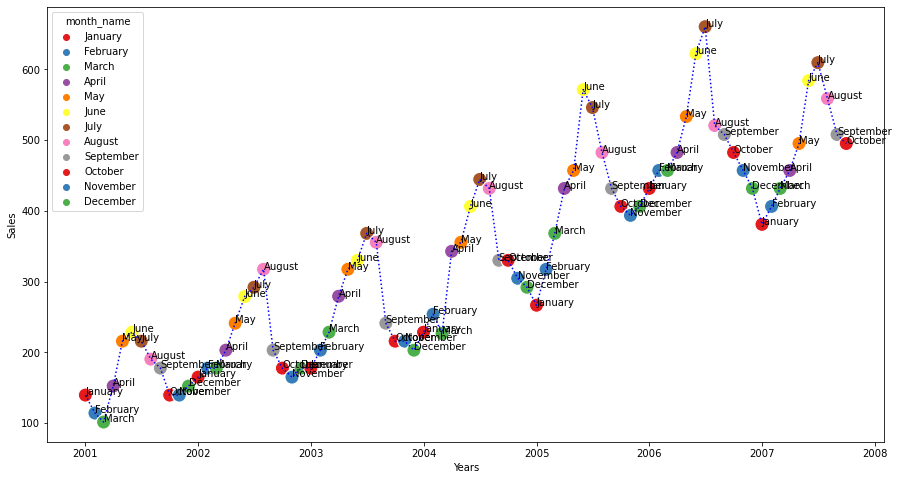

In [17]:
plt.figure(figsize=(15,8))
plt.plot(df_train1["Years"], df_train1["Sales"], "b:")
sns.scatterplot("Years", "Sales", data=df_train1, s=200, hue="month_name", palette="Set1")
for index_line in range(len(df_train1)):
	plt.text(df_train1["Years"][index_line], df_train1["Sales"][index_line], df_train1["month_name"][index_line])

# Correction de l'étape précédente: Création et remplissage des lignes correspondants au mois
 Création d'un DF via pandas.dummies


In [18]:
"""
dum_train = pd.get_dummies(df_train1["month_name"])
dum_train1 = pd.concat((df_train1, dum_train), axis = 1)
df_train1
"""

'\ndum_train = pd.get_dummies(df_train1["month_name"])\ndum_train1 = pd.concat((df_train1, dum_train), axis = 1)\ndf_train1\n'

In [19]:
columns_for_regression = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "Time"]
x_train_add = df_train1[columns_for_regression].values 
y_train_add = df_train1["Sales"].values

x_test_add = df_test1[columns_for_regression].values 
y_test_add = df_test1["Sales"].values
df_test1

,Years,Sales,Unnamed: 2,Time,month_name,January,February,March,April,May,June,July,August,September,October,November,December
82,2007-11-01,444.5,NaN,83,November,0,0,0,0,0,0,0,0,0,0,1,0
83,2007-12-01,419.1,NaN,84,December,0,0,0,0,0,0,0,0,0,0,0,1
84,2008-01-01,431.8,NaN,85,January,1,0,0,0,0,0,0,0,0,0,0,0
85,2008-02-01,444.5,NaN,86,February,0,1,0,0,0,0,0,0,0,0,0,0
86,2008-03-01,495.3,NaN,87,March,0,0,1,0,0,0,0,0,0,0,0,0
87,2008-04-01,533.4,NaN,88,April,0,0,0,1,0,0,0,0,0,0,0,0
88,2008-05-01,558.8,NaN,89,May,0,0,0,0,1,0,0,0,0,0,0,0
89,2008-06-01,647.7,NaN,90,June,0,0,0,0,0,1,0,0,0,0,0,0
90,2008-07-01,673.1,NaN,91,July,0,0,0,0,0,0,1,0,0,0,0,0
91,2008-08-01,660.4,NaN,92,August,0,0,0,0,0,0,0,1,0,0,0,0


Régression linéaire:

In [20]:
model_add = LinearRegression()

In [21]:
model_add.fit(x_train_add, y_train_add)

LinearRegression()

In [22]:
y_fitted_values_add = model_add.predict(x_train_add)
y_predicted_values_add = model_add.predict(x_test_add)

In [23]:
error_add = y_test_add - y_predicted_values_add
std_error_add = error_add.std()
interval_add = 4.4 * std_error_add

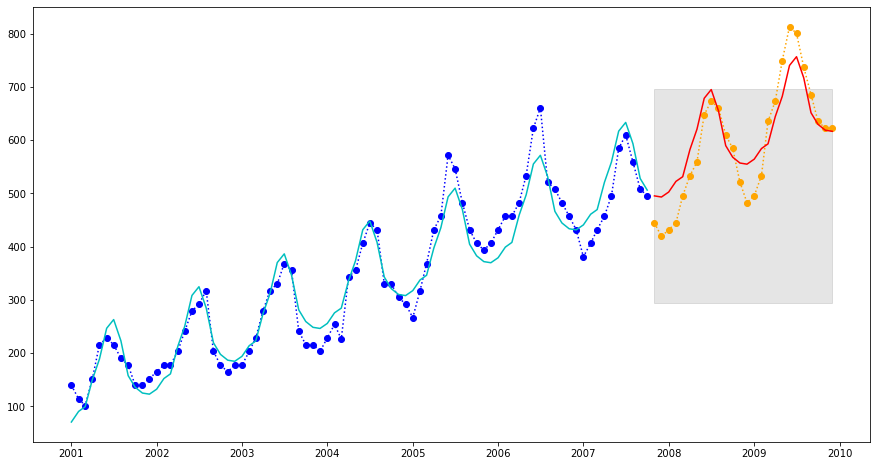

In [24]:
plt.figure(figsize = (15,8))
plt.plot(df_train1["Years"], y_train_add, "bo:")
plt.plot(df_train1["Years"], y_fitted_values_add, "c")

plt.plot(df_test1["Years"], y_test_add, "o:", color="orange")
plt.plot(df_test1["Years"], y_predicted_values_add, color="red")

marge_min_add = y_predicted_values_add - interval_add
marge_max_add = y_predicted_values_add + interval_add
plt.fill_between(df_test1['Years'], marge_max_add[0], marge_min_add[0], alpha=0.1, color="black")

plt.show()